In [2]:
import numpy as np 
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers,callbacks
from keras.utils import to_categorical
import numpy as np
import pandas as pd
train_data=pd.read_csv("train.csv")


X_train, X_val = train_test_split(train_data, test_size=0.2, random_state=18)

In [4]:

X=X_train.drop("emotions",axis=1)
Y=X_train["emotions"]
X_valid=X_val.drop("emotions",axis=1)
Y_valid=X_val["emotions"]

In [9]:
model=keras.Sequential([
    layers.BatchNormalization(input_shape=[2304]),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7,activation='linear'),
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)
model.summary()


early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Bat  (None, 2304)              9216      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 256)               590080    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_5 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)              

Epoch 1/100
718/718 [==============================] - 11s 12ms/step - loss: 1.9324 - accuracy: 0.2581 - val_loss: 1.6718 - val_accuracy: 0.3450
Epoch 2/100
718/718 [==============================] - 9s 12ms/step - loss: 1.7148 - accuracy: 0.3182 - val_loss: 1.6479 - val_accuracy: 0.3668
Epoch 3/100
718/718 [==============================] - 9s 13ms/step - loss: 1.6703 - accuracy: 0.3352 - val_loss: 1.6350 - val_accuracy: 0.3680
Epoch 4/100
718/718 [==============================] - 9s 12ms/step - loss: 1.6496 - accuracy: 0.3489 - val_loss: 1.6041 - val_accuracy: 0.3729
Epoch 5/100
718/718 [==============================] - 10s 14ms/step - loss: 1.6281 - accuracy: 0.3614 - val_loss: 1.5940 - val_accuracy: 0.3844
Epoch 6/100
718/718 [==============================] - 9s 13ms/step - loss: 1.6155 - accuracy: 0.3623 - val_loss: 1.5774 - val_accuracy: 0.3885
Epoch 7/100
718/718 [==============================] - 9s 12ms/step - loss: 1.6047 - accuracy: 0.3690 - val_loss: 1.5815 - val_accurac

<Axes: >

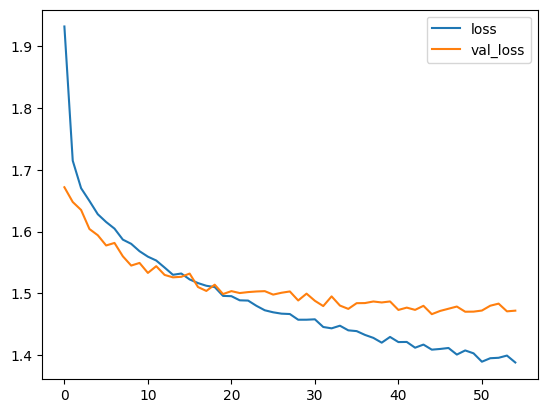

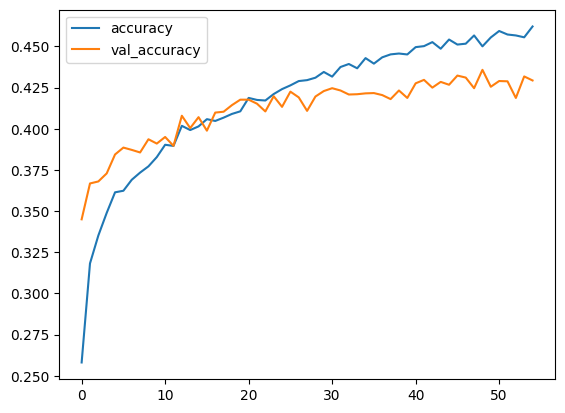

In [10]:
history = model.fit(X, Y, validation_data=(X_valid, Y_valid), epochs=100,callbacks=[early_stopping])
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()